In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

In [9]:
if torch.cuda.is_available():
    print("yes")
else:
    print("No")

yes


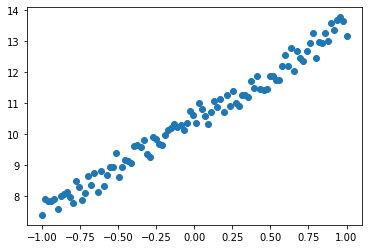

In [11]:
x = torch.unsqueeze(torch.linspace(-1,1, 100), dim=1)
y = 3*x + 10 + torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [13]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        out = self.linear(x)
        return out

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

Epoch[20/1000], loss:0.063467
Epoch[40/1000], loss:0.063466
Epoch[60/1000], loss:0.063465
Epoch[80/1000], loss:0.063464
Epoch[100/1000], loss:0.063464
Epoch[120/1000], loss:0.063463
Epoch[140/1000], loss:0.063463
Epoch[160/1000], loss:0.063463
Epoch[180/1000], loss:0.063463
Epoch[200/1000], loss:0.063463
Epoch[220/1000], loss:0.063463
Epoch[240/1000], loss:0.063463
Epoch[260/1000], loss:0.063463
Epoch[280/1000], loss:0.063462
Epoch[300/1000], loss:0.063462
Epoch[320/1000], loss:0.063462
Epoch[340/1000], loss:0.063462
Epoch[360/1000], loss:0.063462
Epoch[380/1000], loss:0.063462
Epoch[400/1000], loss:0.063462
Epoch[420/1000], loss:0.063462
Epoch[440/1000], loss:0.063462
Epoch[460/1000], loss:0.063462
Epoch[480/1000], loss:0.063462
Epoch[500/1000], loss:0.063462
Epoch[520/1000], loss:0.063462
Epoch[540/1000], loss:0.063462
Epoch[560/1000], loss:0.063462
Epoch[580/1000], loss:0.063462
Epoch[600/1000], loss:0.063462
Epoch[620/1000], loss:0.063462
Epoch[640/1000], loss:0.063462
Epoch[660/10

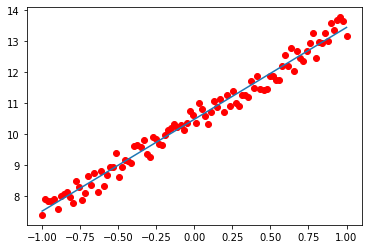

In [15]:
num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)

    out = model(inputs)
    loss = criterion(out, target)

    optimizer.zero_grad()
    loss.backward()#反向传播，计算当前按梯度
    optimizer.step()#根据梯度更新网络

    if(epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.item()))#invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item()` in C++ to convert a 0-dim tensor to a number
model.eval()
if torch.cuda.is_available():
    predict = model(Variable(x).cuda())
    predict = predict.data.cpu().numpy()
else:
    predict = model(Variable(x))
    predict = predict.data.numpy()

plt.plot(x.numpy(), y.numpy(), 'ro', label='Original Data')
plt.plot(x.numpy(), predict, label='Original Data')
plt.show()